# <font color='#0C509E' style='font-size: 40px;'>K-Nearest Neighbors (KNN)</font>

# <font color='#000' style='font-size: 30px;'>Importando as bibliotecas</font>
<hr style='border: 1px solid #000;'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# <font color='#000' style='font-size: 30px;'>Importando o dataset</font>
<hr style='border: 1px solid #000;'>

Source: https://www.kaggle.com/rakeshrau/social-network-ads

In [3]:
data = pd.read_csv('datasets/Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Excluindo a coluna 'User ID'

In [5]:
# data.drop(labels=['User ID'], axis=1, inplace=True)
del data['User ID']

In [6]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Renomeando as colunas

In [7]:
data.columns = ['Genero', 'Idade', 'Salario', 'Comprado']

In [12]:
data.head()

,Genero,Idade,Salario,Comprado
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [13]:
data.shape

(400, 4)

### Deixando as opções de gênero em Português

In [16]:
selecao = data['Genero'] == 'Male'
data.loc[selecao, 'Genero'] = 'Masculino'
data.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,0
1,Masculino,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Masculino,19,76000,0


In [22]:
data.loc[~selecao, 'Genero'] = 'Feminino'
data.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,0
1,Masculino,35,20000,0
2,Feminino,26,43000,0
3,Feminino,27,57000,0
4,Masculino,19,76000,0


In [23]:
data['Genero'].unique()

array(['Masculino', 'Feminino'], dtype=object)

### Convertendo a variável 'Comprado' em Categórica (apenas para facilitar a análise exploratória)

In [24]:
data['Comprado'].unique()

array([0, 1])

In [27]:
selecao = data['Comprado'] == 0
data.loc[selecao, 'Comprado'] = 'Não'
data

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não
...,...,...,...,...
395,Feminino,46,41000,1
396,Masculino,51,23000,1
397,Feminino,50,20000,1
398,Masculino,36,33000,Não


In [30]:
data.loc[~selecao, 'Comprado'] = 'Sim'
data

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não
...,...,...,...,...
395,Feminino,46,41000,Sim
396,Masculino,51,23000,Sim
397,Feminino,50,20000,Sim
398,Masculino,36,33000,Não


In [31]:
data['Comprado'].unique()

array(['Não', 'Sim'], dtype=object)

# <font color='#000' style='font-size: 30px;'>Informações básicas do Dataset</font>
<hr style='border: 1px solid #000;'>

In [32]:
print(f'O dataset possui {data.shape[0]} exemplos/observações/amostras/linhas e {data.shape[1]} atributos/características/variáveis/colunas')

O dataset possui 400 exemplos/observações/amostras/linhas e 4 atributos/características/variáveis/colunas


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genero    400 non-null    object
 1   Idade     400 non-null    int64 
 2   Salario   400 non-null    int64 
 3   Comprado  400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


# <font color='#000' style='font-size: 30px;'>Exploratory Data Analysis (EDA)</font>
<hr style='border: 1px solid #000;'>

In [35]:
data.describe().round(2)

,Idade,Salario
count,400.00,400.00
mean,37.66,69742.50
std,10.48,34096.96
min,18.00,15000.00
25%,29.75,43000.00
50%,37.00,70000.00
75%,46.00,88000.00
max,60.00,150000.00


<AxesSubplot:ylabel='Idade'>

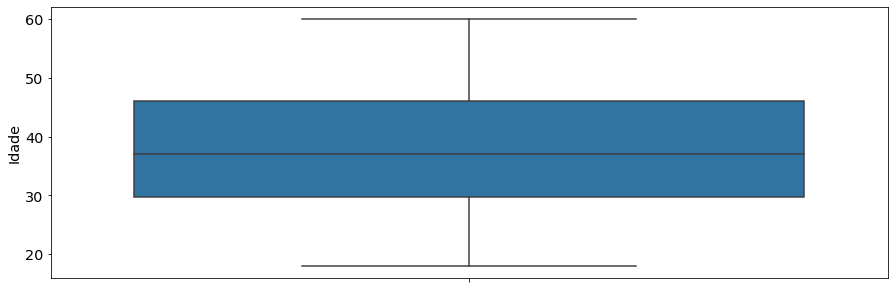

In [37]:
sns.boxplot(data=data, y='Idade')

<AxesSubplot:ylabel='Salario'>

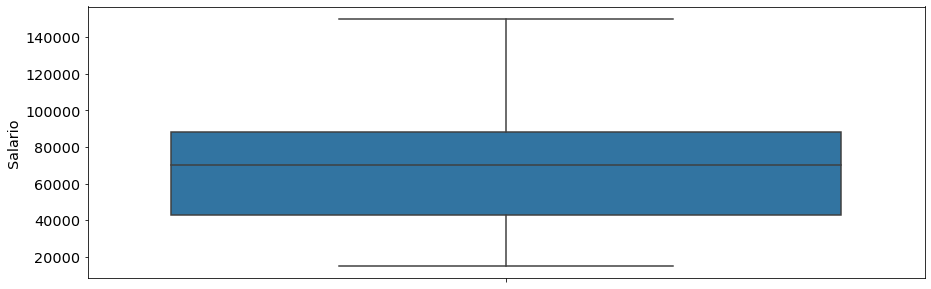

In [38]:
sns.boxplot(data=data, y='Salario')

### Proporção de Gêneros

In [44]:
data['Genero'].value_counts()

Feminino     204
Masculino    196
Name: Genero, dtype: int64

In [45]:
data['Genero'].value_counts() / data.shape[0]

Feminino     0.51
Masculino    0.49
Name: Genero, dtype: float64

<AxesSubplot:xlabel='Genero', ylabel='count'>

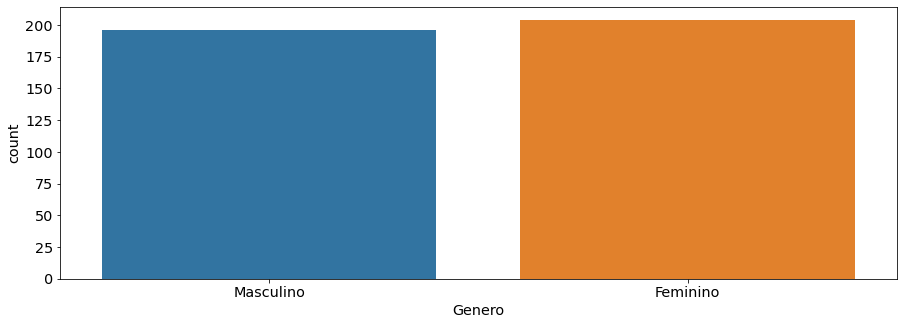

In [46]:
sns.countplot(data=data, x='Genero')

### Proporção de Produtos/Serviços Comprados

In [47]:
data['Comprado'].value_counts()

Não    257
Sim    143
Name: Comprado, dtype: int64

In [48]:
data['Comprado'].value_counts() / data.shape[0]

Não    0.6425
Sim    0.3575
Name: Comprado, dtype: float64

<AxesSubplot:xlabel='Comprado', ylabel='count'>

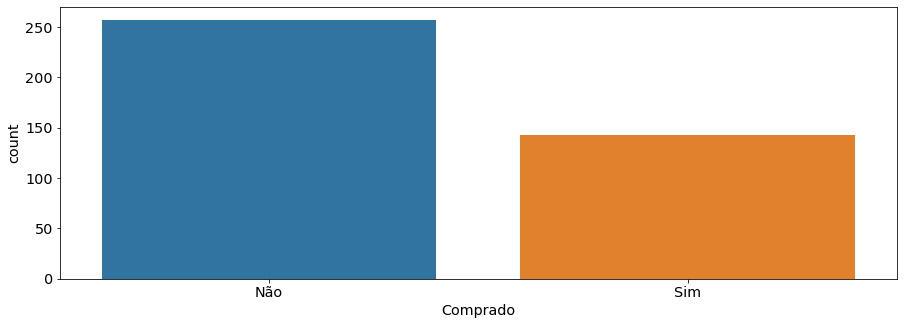

In [49]:
sns.countplot(data=data, x='Comprado')

### Proporção de Produtos/Serviços Comprados por Gênero

<AxesSubplot:xlabel='Comprado', ylabel='count'>

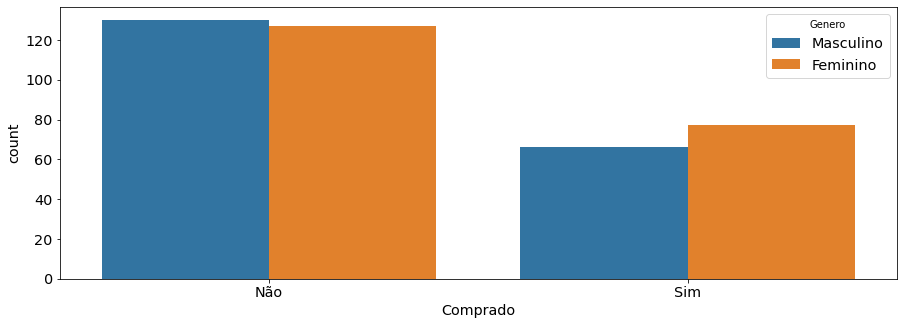

In [51]:
sns.countplot(data=data, x='Comprado', hue='Genero')

### Distribuição de Salários

<AxesSubplot:ylabel='Salario'>

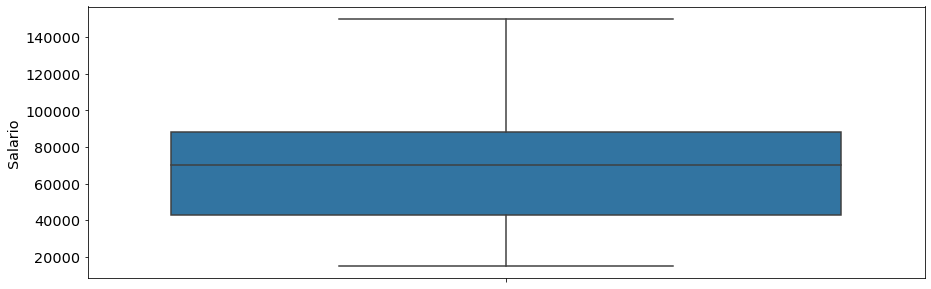

In [52]:
sns.boxplot(data=data, y='Salario')  # considerando ambos os gêneros juntos

#### Distribuição de Salários por Gênero

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

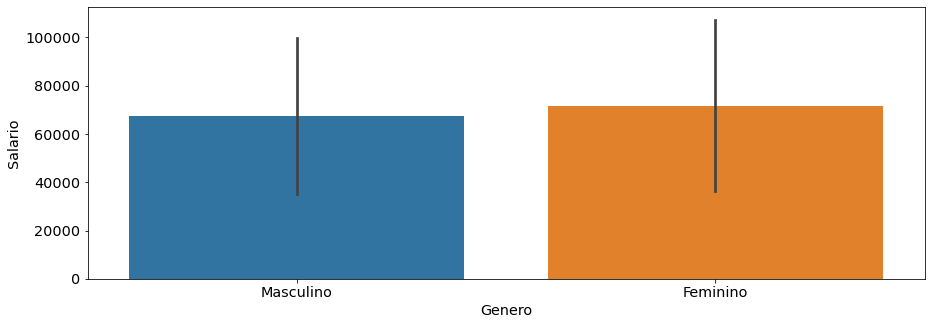

In [54]:
sns.barplot(data=data, x='Genero', y='Salario', ci='sd')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

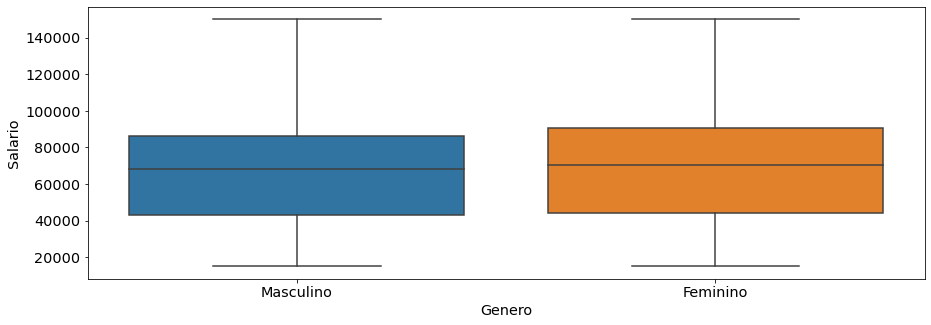

In [55]:
sns.boxplot(data=data, x='Genero', y='Salario')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

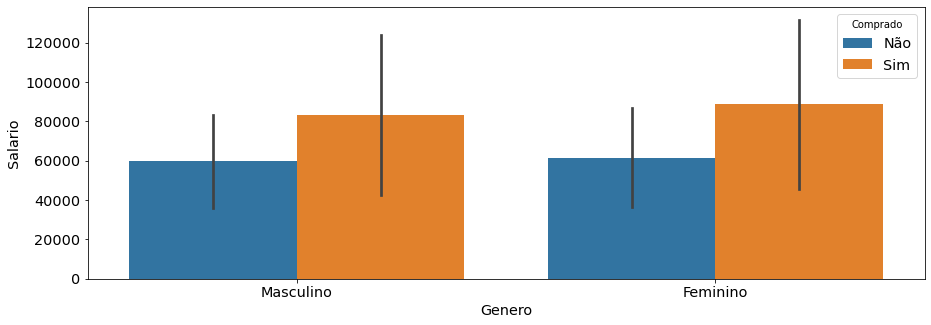

In [57]:
sns.barplot(data=data, x='Genero', y='Salario', hue='Comprado', ci='sd')

<AxesSubplot:xlabel='Genero', ylabel='Salario'>

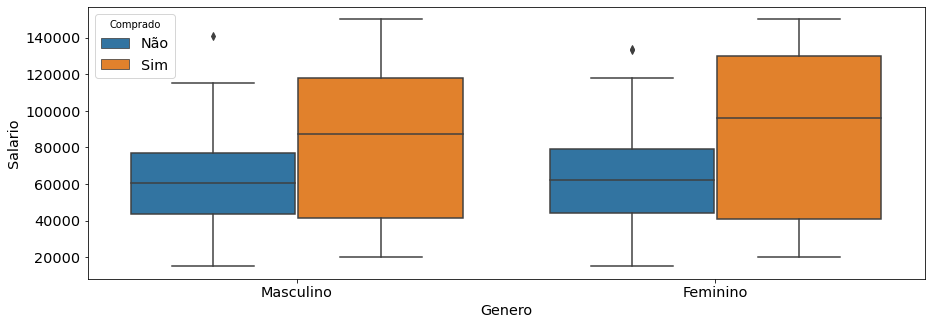

In [58]:
sns.boxplot(data=data, x='Genero', y='Salario', hue='Comprado')

Parece que temos alguns _outliers_ para os salários de pessoas que não compraram os produtos/serviços.<br/>
A princípio, vou deixar como está, mas talvez fosse interessante remover tais outliers.

### Distribuição de Salários por Idade

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

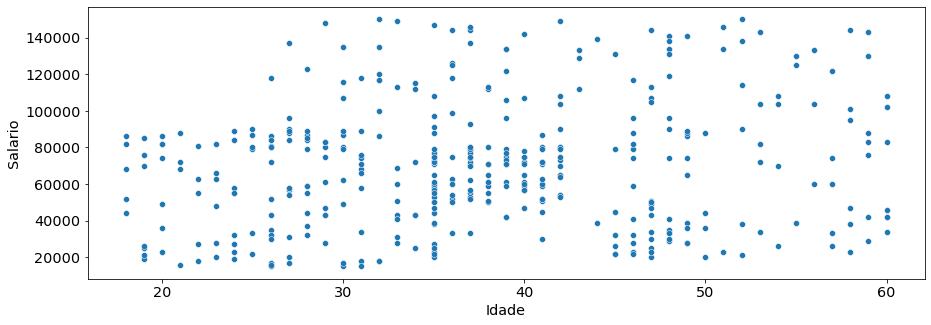

In [59]:
sns.scatterplot(data=data, x='Idade', y='Salario')

In [61]:
data.corr()

,Idade,Salario
Idade,1.000000,0.155238
Salario,0.155238,1.000000


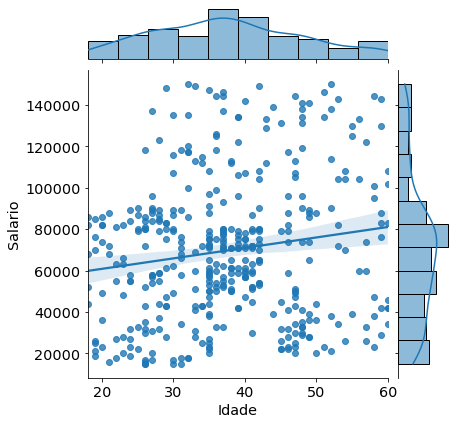

In [64]:
sns.jointplot(data=data, x='Idade', y='Salario', kind='reg')

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

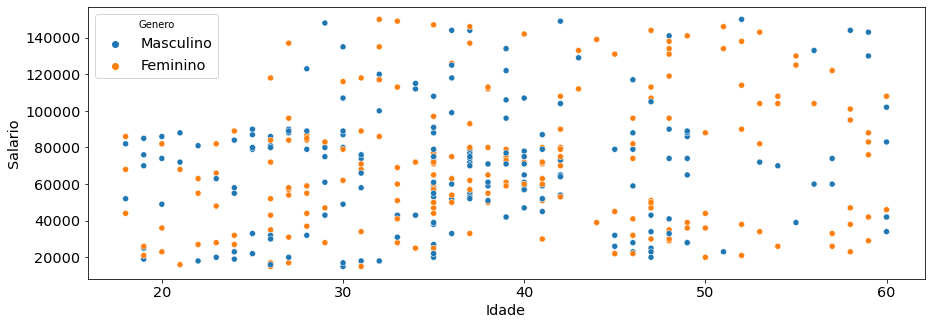

In [65]:
sns.scatterplot(data=data, x='Idade', y='Salario', hue='Genero')

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

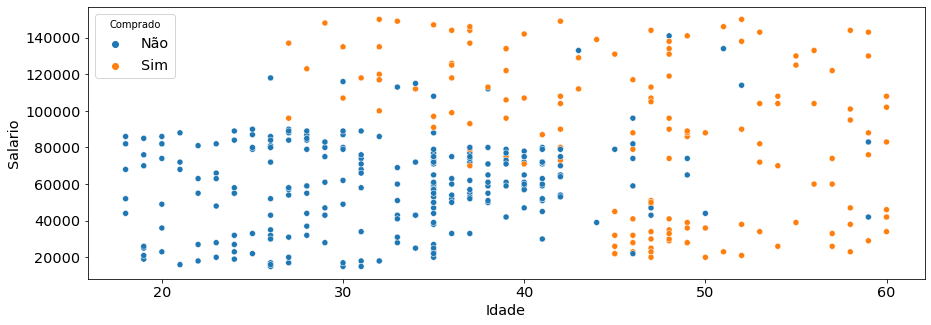

In [66]:
sns.scatterplot(data=data, x='Idade', y='Salario', hue='Comprado')

# <font color='#000' style='font-size: 30px;'>Preprocessamento de dados</font>
<hr style='border: 1px solid #000;'>

### Convertendo o Gênero em Dummy Variable

Como a variável categórica 'Gênero' é **binária**, não precisamos criar _duas colunas_ para representá-la. Basta transformar o valor de um gênero para Zero e o outro para 1 que é suficiente. <br/>
Note que isso também já resolve o **Dummy Variable Trap**.

In [68]:
data_pre = data.copy()

In [69]:
data_pre.head()

,Genero,Idade,Salario,Comprado
0,Masculino,19,19000,Não
1,Masculino,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,Masculino,19,76000,Não


In [72]:
selecao = data_pre['Genero'] == 'Masculino'
data_pre.loc[selecao, 'Genero'] = 0
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,Feminino,26,43000,Não
3,Feminino,27,57000,Não
4,0,19,76000,Não


In [74]:
data_pre.loc[~selecao, 'Genero'] = 1
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,1,26,43000,Não
3,1,27,57000,Não
4,0,19,76000,Não


In [77]:
data_pre['Genero'].unique()

array([0, 1], dtype=object)

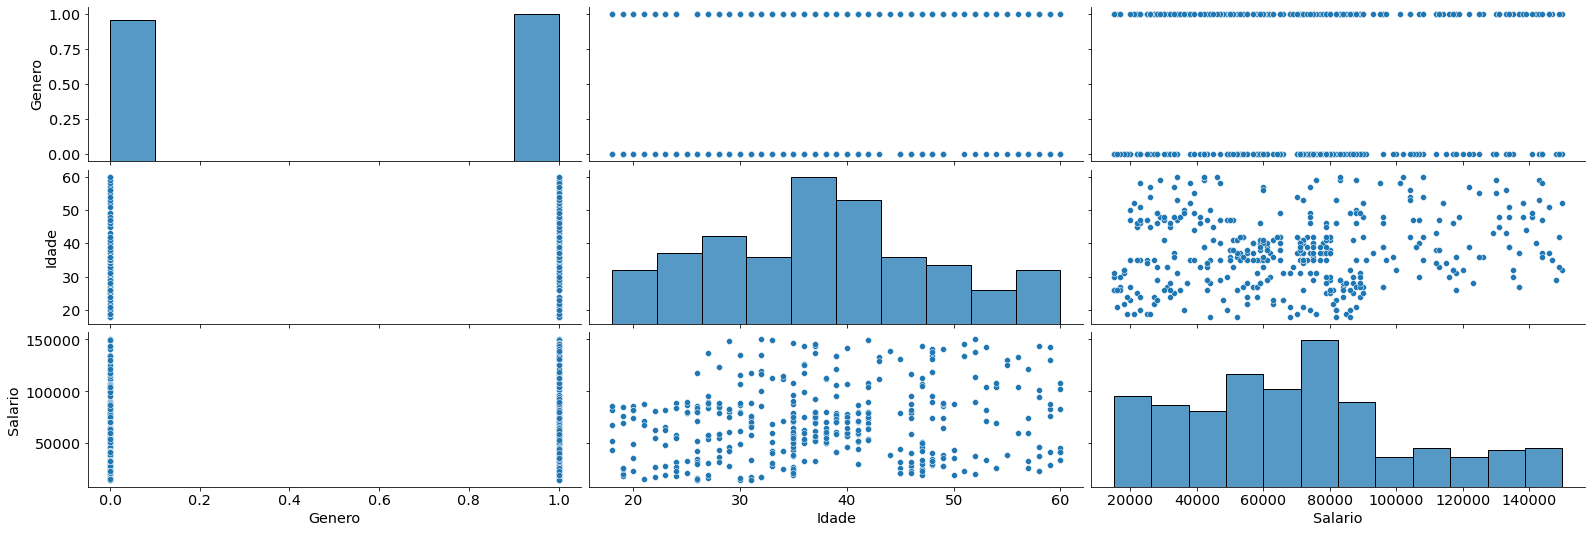

In [78]:
sns.pairplot(data=data_pre, aspect=3)

# <font color='#000' style='font-size: 30px;'>K-Nearest Neighbors</font>
<hr style='border: 1px solid #000;'>

## Data sampling – Amostrando o conjunto de dados

#### Separando as variáveis independentes e dependente (classe)

In [81]:
X = data_pre.drop(axis=1, labels=['Comprado'])  # feature matrix – matriz de características

In [82]:
X.head()

,Genero,Idade,Salario
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [83]:
data_pre.head()

,Genero,Idade,Salario,Comprado
0,0,19,19000,Não
1,0,35,20000,Não
2,1,26,43000,Não
3,1,27,57000,Não
4,0,19,76000,Não


In [84]:
y = data_pre['Comprado']  # nossas classes

In [85]:
y.head()

0    Não
1    Não
2    Não
3    Não
4    Não
Name: Comprado, dtype: object

#### Amostrando a base de dados (de forma balanceada)

In [88]:
data['Genero'].value_counts()

Feminino     204
Masculino    196
Name: Genero, dtype: int64

In [89]:
data['Genero'].value_counts() / data.shape[0]

Feminino     0.51
Masculino    0.49
Name: Genero, dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

# por padrão, o parâmetro stratify é None, o que significa que o sampling (amostragem) respeitará a proporção de amostras das classes do conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Conferindo o balanceamento das classes

In [101]:
X_train['Genero'].value_counts() / X_train.shape[0]

1    0.5125
0    0.4875
Name: Genero, dtype: float64

In [102]:
X_test['Genero'].value_counts() / X_test.shape[0]

1    0.5
0    0.5
Name: Genero, dtype: float64

## Feature scaling

A escala de valores para o atributo _'Idade'_ é muito menor (com menores valores também) do que o _'Salario'_. Desta forma, na hora que o KNN computar a distância Euclideana entre as amostras no espaço de características, os _salários_ dominarão o cômputo da distância: a distância ficará **_enviesada_** para os valores dos _salários_. <br/>
Para resolver isso, precisamos **normalizar** os dados.

<AxesSubplot:>

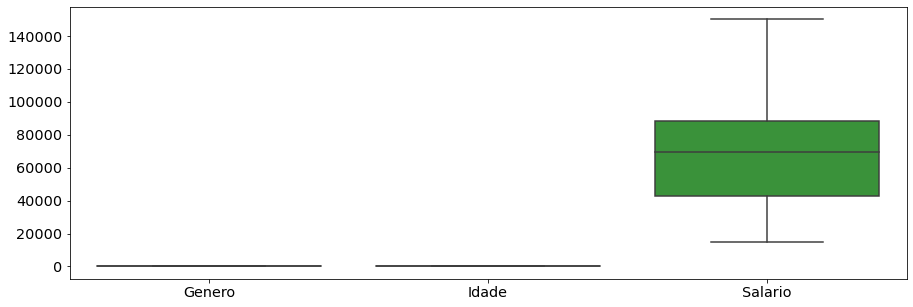

In [104]:
sns.boxplot(data=X_train)

In [105]:
X_train.head()

,Genero,Idade,Salario
336,0,58,144000
64,1,59,83000
55,1,24,55000
106,1,26,35000
300,1,58,38000


In [107]:
X_train.min()

Genero         0
Idade         18
Salario    15000
dtype: int64

In [108]:
X_train.max()

Genero          1
Idade          60
Salario    150000
dtype: int64

#### 'Treinando' o Feature Scaler

As duas principais técnicas de _Feature Scaling_ são: _**Normalization (MinMax Scaler)**_ e _**Standardization**_. Nesse exemplo, usaremos a primeira.

**IMPORTANTE:** A fim de evitar qualquer problema de overfitting, precisamos 'treinar' nosso escalador **apenas** com o _conjunto de treinamento_.

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # 'treinando' o feature scaler

MinMaxScaler()

In [110]:
scaler.data_min_

array([    0.,    18., 15000.])

In [111]:
scaler.data_max_

array([1.0e+00, 6.0e+01, 1.5e+05])

#### Escalando os dados de Treino e Teste

Apesar de, aparentemente, a normalização não ter mudado muito a 'cara' da distribuição dos dados nas visualizações, seu papel é crucial durante o cômputo das distâncias.

In [112]:
X_train_final = scaler.transform(X_train)
X_test_final = scaler.transform(X_test)

<AxesSubplot:>

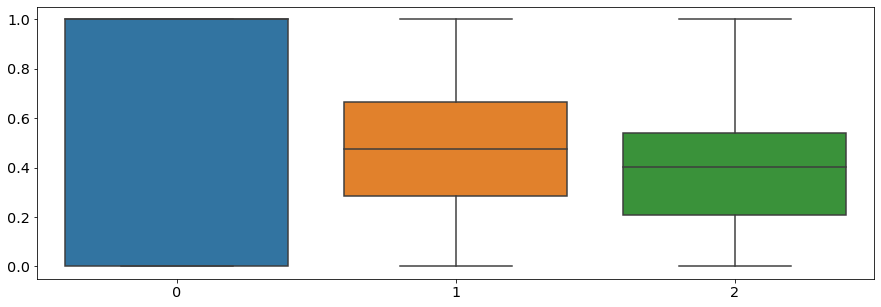

In [114]:
sns.boxplot(data=X_train_final)

<AxesSubplot:xlabel='Idade', ylabel='Salario'>

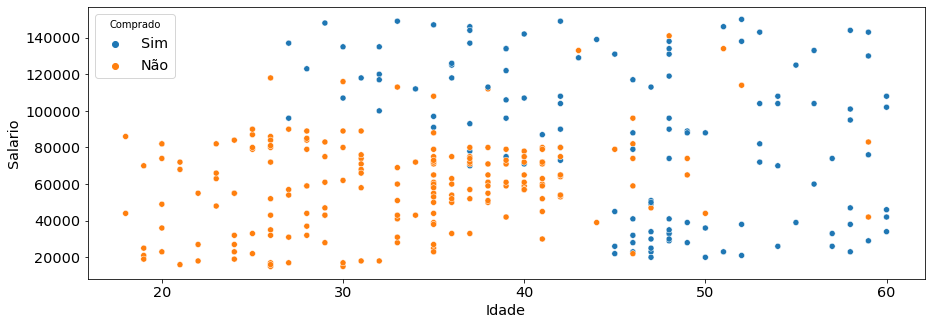

In [115]:
sns.scatterplot(data=X_train, x='Idade', y='Salario', hue=y_train)  # dados originais (sem escalar)

<AxesSubplot:>

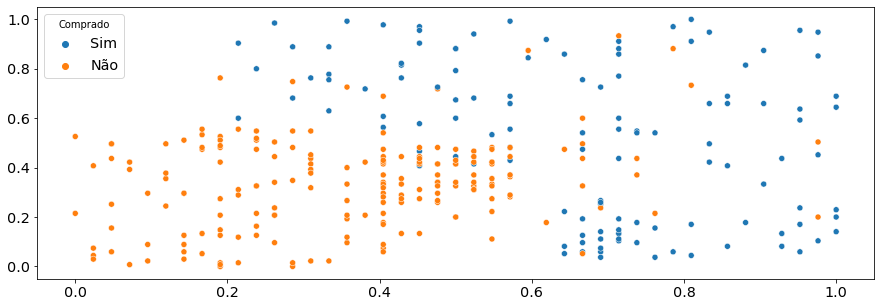

In [116]:
sns.scatterplot(x=X_train_final[:, 1], y=X_train_final[:, 2], hue=y_train)

Apesar de, aparentemente, a normalização não ter mudado muito a 'cara' da distribuição dos dados nas visualizações, seu papel é crucial durante o cômputo das distâncias.

## "Treinando" o modelo KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=5)  # considera um número k de vizinhos igual 5
classifier.fit(X_train_final, y_train)

KNeighborsClassifier(metric='euclidean')

## Classificando/estimando/predizendo um novo resultado

In [151]:
amostra_de_teste = X_test_final[0]
amostra_de_teste

array([0.        , 0.28571429, 0.53333333])

In [152]:
X_test.iloc[0]

Genero         0
Idade         30
Salario    87000
Name: 132, dtype: object

In [153]:
classifier.predict([amostra_de_teste])

array(['Não'], dtype=object)

## Classificando/estimando/predizendo o conjunto de testes

In [144]:
y_pred = classifier.predict(X_test_final)

In [145]:
y_pred

array(['Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não',
       'Sim', 'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não',
       'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não',
       'Não', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não',
       'Sim', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Não', 'Não', 'Não', 'Não', 'Sim', 'Sim'],
      dtype=object)

In [146]:
resultados = pd.DataFrame({
    'True Label': y_test, # gabarito == rótulos/classes verdadeiras para as amostras de teste
    'Pred Label': y_pred, # rótulos/classes preditas/classificadas pelo nosso modelo
    'Hit': y_test == y_pred
})

In [147]:
resultados

,True Label,Pred Label,Hit
132,Não,Não,True
309,Não,Não,True
341,Não,Não,True
196,Não,Não,True
246,Não,Não,True
...,...,...,...
14,Não,Não,True
363,Não,Não,True
304,Não,Não,True
361,Sim,Sim,True


In [148]:
resultados['Hit'].value_counts()  # quantidade de acertos e erros

True     76
False     4
Name: Hit, dtype: int64

## Métricas de avaliação

### ==> Matriz de confusão

<img src='images/confusion_matrix.png' width=250px/>

In [149]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[55,  3],
       [ 1, 21]])

In [156]:
tn, fp, fn, tp = conf_matrix.ravel()

In [157]:
conf_matrix_df = pd.DataFrame({
    'Pred Label – Negative': [tn, fn],
    'Pred Label – Positive': [fp, tp]
}, index=['True Label – Negative', 'True Label – Positive'])

In [159]:
conf_matrix_df

,Pred Label – Negative,Pred Label – Positive
True Label – Negative,55,3
True Label – Positive,1,21


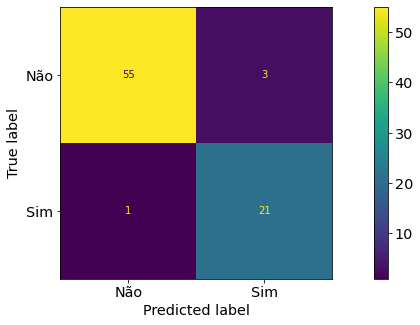

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot()

### ==> Precision / Recall

<img src='images/Precisionrecall.svg'/>

_Selected elements_ são amostradas classificadas como da **_Classe Positiva_**.

_Relevant elements_ são amostradas cuja classe verdadeira é a **_Classe Positiva_**.

<div style="font-size: 20pt">$Precision = \frac{TP}{TP+FP}$</div>

_Dos itens classificados como positivo, quantos de fato são **verdadeiros positivos**?_ <br/>
_O quão preciso o classificador é ao classificar amostras como **positivas**?_ <br/>
_Ex: O quão preciso o classificador é nos pacientes que ele classificou com cancer?_

<div style="font-size: 20pt">$Recall = Sensitivity = True Positive Rate = \frac{TP}{FN+TP}$</div>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_

### ==> Sensitivity / Specificity

<img src='images/Sensitivity_and_specificity.png'/>

<div style="font-size: 20pt">$Sensitivity = Recall = True Positive Rate = \frac{TP}{FN+TP}$</div>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_

<div style="font-size: 20pt">$Specificity = True Negative Rate = \frac{TN}{FN+TN}$</div>

_Quantas amostras classificadas como **negativas** são realmente **negativas**?_ <br/>
_Ex: Quantos pacientes saudáveis são identificados como não tendo cancer?_

### ==> Acurácia

<div style="font-size: 20pt">$Accuracy = \frac{TP+TN}{TN+FN+FP+TP}$</div>

_Qual foi a taxa de acerto (geral) da classificação?_

Foca nos **True Positives e True Negatives**. Não leva muito em conta os erros de classificação (FP e FN).

### ==> F1-Score (ou Dice score)

Média harmonica da _Precision_ e _Recall_. Leva mais em consideração os **erros de classificação (FP e FN)** do que a _Acurácia_.

<div style="font-size: 20pt">$F1 = 2 * \frac{precision * recall}{precision + recall}$</div>

#### Accuracy vs F1-Score

- _Accuracy_ é usada quando as taxas de **Verdadeiros Positivos** e **Verdadeiros Negativos** são mais importantes (taxas de acerto), enquanto _F1-score_ é usado quando as taxas de **Falsos Positivos** e **Falsos Negativos** são _cruciais_;
- _Accuracy_ pode ser usada quando a distribuição de classes das amostras de teste é _similar_, enquanto a _F1-score_ é uma métrica melhor quando há desbalanceamento de classes nas amostras de teste;
- Em problemas de classificação do "mundo real", o desbalanceamento de classes é comum, logo a _F1-score_ tende a ser uma métrica de avaliação mais interessante do que a _Accuracy_.

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.

## Justando todas as métricas

# <font color='#000' style='font-size: 30px;'>Buscando o melhor valor para K</font>
<hr style='border: 1px solid #000;'>

## Analisando os resultados para um conjunto de valores para K

## Busca de valores por Grid Seach